Steepness (β₁): 9.91
Starting point (β₀): 0.65


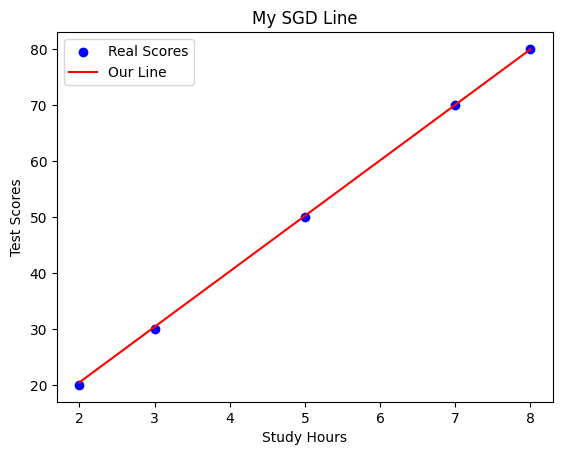

Score for 6 hours: 60.10


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Our data
hours = np.array([2, 3, 5, 7, 8])  # Study hours
scores = np.array([20, 30, 50, 70, 80])  # Test scores

# Start with guesses
beta_0 = 0  # Where the line starts
beta_1 = 0  # How steep the line is
learning_rate = 0.01  # How big our steps are
steps = 100  # How many times we try

# SGD magic
np.random.seed(42)  # Keeps results the same each time
for step in range(steps):
    for i in np.random.permutation(len(hours)):  # Pick points randomly
        x = hours[i]
        y = scores[i]
        guess = beta_0 + beta_1 * x  # Our line’s guess
        error = guess - y  # How wrong we are
        
        # Fix the line a little
        beta_0 = beta_0 - learning_rate * error
        beta_1 = beta_1 - learning_rate * error * x

print(f"Steepness (β₁): {beta_1:.2f}")
print(f"Starting point (β₀): {beta_0:.2f}")

# Guess all scores
guessed_scores = beta_0 + beta_1 * hours

# Draw it
plt.scatter(hours, scores, color="blue", label="Real Scores")
plt.plot(hours, guessed_scores, color="red", label="Our Line")
plt.xlabel("Study Hours")
plt.ylabel("Test Scores")
plt.title("My SGD Line")
plt.legend()
plt.show()

# Guess for 6 hours
new_hours = 6
new_score = beta_0 + beta_1 * new_hours
print(f"Score for {new_hours} hours: {new_score:.2f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Steepness (β₁): 9.90
Starting point (β₀): 0.63


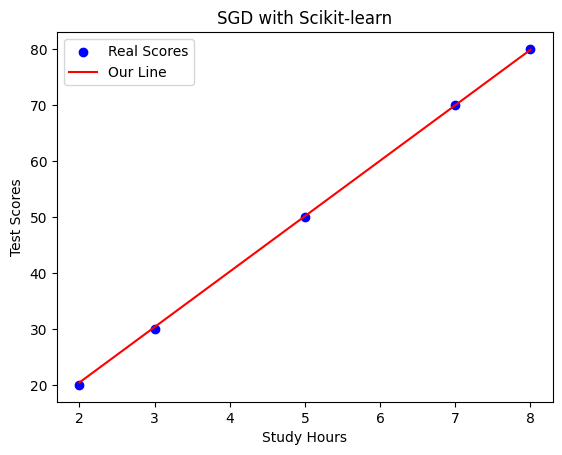

Score for 6 hours: 60.04


In [3]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Our data
hours = np.array([2, 3, 5, 7, 8]).reshape(-1, 1)  # Study hours
scores = np.array([20, 30, 50, 70, 80])  # Test scores

# Make the model
model = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=100, random_state=42)
model.fit(hours, scores)

# Get the line details
beta_1 = model.coef_[0]
beta_0 = model.intercept_[0]

print(f"Steepness (β₁): {beta_1:.2f}")
print(f"Starting point (β₀): {beta_0:.2f}")

# Guess all scores
guessed_scores = model.predict(hours)

# Draw it
plt.scatter(hours, scores, color="blue", label="Real Scores")
plt.plot(hours, guessed_scores, color="red", label="Our Line")
plt.xlabel("Study Hours")
plt.ylabel("Test Scores")
plt.title("SGD with Scikit-learn")
plt.legend()
plt.show()

# Guess for 6 hours
new_hours = np.array([[6]])
new_score = model.predict(new_hours)[0]
print(f"Score for 6 hours: {new_score:.2f}")

In [4]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(scores, guessed_scores)
mse = mean_squared_error(scores, guessed_scores)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 1.00
Mean Squared Error: 0.07
